<a href="https://colab.research.google.com/github/nguyenhuy-vn/Finger-identification-based-on-capacitives-touch-screen/blob/main/data_for_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Load data from pkl file

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/full_preprocess_data.pkl")

In [4]:
#view df
df.head(5)

,Participant,Handedness,Finger,Task,Matrix,Timestamp,BlobCoords,BlobCount,Blobs,BlobImage,BlobImgFlattened
16,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194856,"[(10, 14, 13, 17)]",1,"[[[0, 4, 9, 1], [4, 31, 48, 10], [9, 150, 215,...","[[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[0, 4, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
18,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194926,"[(10, 14, 14, 18)]",1,"[[[1, 17, 27, 5], [6, 105, 140, 27], [18, 161,...","[[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 17, 27, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
19,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
20,3,right,little,TAP,"[[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1]...",1508943194997,"[(10, 14, 13, 18)]",1,"[[[1, 7, 9, 1], [2, 31, 52, 10], [10, 168, 231...","[[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]...","[1, 7, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
df['Finger'].unique()

array(['little', 'middle', 'ring', 'thumb', 'index'], dtype=object)

In [6]:
df['Task'].unique()

array(['TAP', 'DRAG', 'SCROLL'], dtype=object)

In [8]:
df['Participant'].unique()

array([ 3, 12, 19,  9, 17,  6, 14,  8,  1, 11,  4, 16,  2, 10, 15, 13, 18,
        7, 20,  5])

### Split the participant id train

In [9]:
np.random.seed(11)
participant_id = df['Participant'].unique()
size = int(len(participant_id) * 0.8)
participant_id_train = np.random.choice(participant_id, size = size, replace = False)
participant_id_train

array([ 9,  6,  4, 14, 15,  5, 13, 11, 20, 17, 16,  3,  1, 19,  8, 12])

### Encoder and add label column

In [10]:
Handedness = df['Handedness'].unique()
Finger = df['Finger'].unique()
Handedness, Finger

(array(['right', 'left'], dtype=object),
 array(['little', 'middle', 'ring', 'thumb', 'index'], dtype=object))

In [11]:
num = 0
dict_data = {}
for i in range (0, len(Handedness)):
  for j in range (0, len(Finger)):
    dict_temp = {Handedness[i] + ' ' + Finger[j]: num}
    dict_data.update(dict_temp)
    num = num + 1

dict_data

{'right little': 0,
 'right middle': 1,
 'right ring': 2,
 'right thumb': 3,
 'right index': 4,
 'left little': 5,
 'left middle': 6,
 'left ring': 7,
 'left thumb': 8,
 'left index': 9}

In [12]:
def get_feature_column (handedness, finger):
  c = handedness + ' ' + finger
  return dict_data[c]

df['label'] = [get_feature_column(df.Handedness.iloc[i], df.Finger.iloc[i]) for i in range (len(df))]

df['label'].unique()

array([0, 6, 7, 3, 4, 2, 1, 8, 5, 9])

In [13]:
df.iloc[[15966]]

,Participant,Handedness,Finger,Task,Matrix,Timestamp,BlobCoords,BlobCount,Blobs,BlobImage,BlobImgFlattened,label
1450,3,right,ring,SCROLL,"[[0, 1, 0, -70, -2, -2, -106, -2, 0, 0, -3, -2...",1508944175946,"[(1, 5, 10, 13)]",1,"[[[13, 21, 23, 11], [27, 130, 139, 27], [23, 1...","[[13, 21, 23, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[13, 21, 23, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2


### Split data

In [22]:
def get_data (ones_train, ones_test, ones_train_label, ones_test_label, dframe, i):
  for i in range(len(dframe)):
    temp = int(dframe.iloc[i].Participant)
    if (temp == participant_id_train).any():
      arr_train = np.array(dframe.iloc[[i]].Blobs)
      arr_train = arr_train[0][0].astype(np.uint8)
      arr_train = cv2.resize(arr_train, (32, 32), interpolation = cv2.INTER_NEAREST)
      y_temp1 = df.label.iloc[i]
      if( type(ones_train) is str):
        ones_train = [arr_train]
        ones_train_label = [y_temp1]
      else:
        ones_train.extend([arr_train])
        ones_train_label.append(y_temp1)
    else:
      arr_test = np.array(dframe.iloc[[i]].Blobs)
      arr_test = arr_test[0][0].astype(np.uint8)
      arr_test = cv2.resize(arr_test, (32, 32), interpolation=cv2.INTER_NEAREST)
      y_temp2 = df.label.iloc[i]
      if(type(ones_test) is str):
        ones_test = [arr_test]
        ones_test_label = [y_temp2]
      else:
        ones_test.extend([arr_test])
        ones_test_label.append(y_temp2)
  return ones_train, ones_test, ones_train_label, ones_test_label


In [23]:
X_train = ""
X_test = ""
Y_train = ""
Y_test = ""
i = 0
X_train, X_test, Y_train, Y_test = get_data(X_train, X_test, Y_train, Y_test, df, i)

array([[ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       ...,
       [13, 13, 13, ..., 27, 27, 27],
       [13, 13, 13, ..., 27, 27, 27],
       [13, 13, 13, ..., 27, 27, 27]], dtype=uint8)
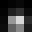

In [24]:
X_train[0]

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [26]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = Y_train.reshape(-1,1)
Y_test  = Y_test.reshape(-1,1)

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.05098039, 0.05098039, 0.05098039, ..., 0.10588235, 0.10588235,
        0.10588235],
       [0.05098039, 0.05098039, 0.05098039, ..., 0.10588235, 0.10588235,
        0.10588235],
       [0.05098039, 0.05098039, 0.05098039, ..., 0.10588235, 0.10588235,
        0.10588235]], dtype=float32)

In [28]:
np.random.seed(11)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)

X_train.shape, X_val.shape, X_test.shape

((295791, 32, 32), (73948, 32, 32), (85970, 32, 32))

### One hot enconding

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()

In [31]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

### Save matrix


In [33]:
label = list ((dict_data.keys()))
label

['right little',
 'right middle',
 'right ring',
 'right thumb',
 'right index',
 'left little',
 'left middle',
 'left ring',
 'left thumb',
 'left index']

In [34]:
label_me = np.array(label)
label_me

array(['right little', 'right middle', 'right ring', 'right thumb',
       'right index', 'left little', 'left middle', 'left ring',
       'left thumb', 'left index'], dtype='<U12')

In [35]:
#save data train and test
np.save('/content/drive/MyDrive/data_for_10/X_train.npy', X_train)
np.save('/content/drive/MyDrive/data_for_10/X_val.npy', X_val)
np.save('/content/drive/MyDrive/data_for_10/X_test.npy', X_test)
np.save('/content/drive/MyDrive/data_for_10/Y_train.npy', Y_train)
np.save('/content/drive/MyDrive/data_for_10/Y_val.npy', Y_val)
np.save('/content/drive/MyDrive/data_for_10/Y_test.npy', Y_test)
np.save('/content/drive/MyDrive/data_for_10/label.npy', label_me)